# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# (a)

In [2]:
# (a) Load data (features)
def load_data(file_name):
    data = np.load(file_name)
    new = data - np.mean(data, axis=0)
    data = new / np.std(new, axis=0)
    return data

In [3]:
data = load_data('features.npy')
data

array([[-0.90068117,  1.03205722, -1.3412724 , ...,  1.69444872,
        -0.40857323,  0.46550025],
       [-1.14301691, -0.1249576 , -1.3412724 , ..., -1.70906049,
        -2.2365549 , -2.43747468],
       [-1.38535265,  0.33784833, -1.39813811, ...,  0.60124292,
        -0.97539158, -0.35271352],
       ...,
       [ 0.79566902, -0.1249576 ,  0.81962435, ...,  0.41447536,
         1.02554633,  1.1042481 ],
       [ 0.4321654 ,  0.80065426,  0.93335575, ...,  0.787192  ,
         1.15078808,  1.38507878],
       [ 0.06866179, -0.1249576 ,  0.76275864, ..., -2.06891286,
        -0.54807894, -1.47672658]])

# (b)

In [4]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    
    matrix = np.dot(X.T,X)
    
    eigenValues,eigenVectors = LA.eig(matrix)
    
    idx = eigenValues.argsort()[::-1]   
    sorted_eig_vals = eigenValues[idx]
    sorted_eig_vecs = eigenVectors[:,idx]

    return sorted_eig_vals, sorted_eig_vecs

In [5]:
sorted_eig_vals, sorted_eig_vecs = eigendecomp(data)
sorted_eig_vals

array([ 7.06705452e+02,  3.42082110e+02,  1.15759666e+02,  3.04217623e+01,
        5.03100974e+00,  7.56528662e-14,  2.79855194e-14, -4.69591010e-14])

In [6]:
sorted_eig_vecs

array([[-0.39124937,  0.13884872, -0.46160937,  0.58034539,  0.24934936,
         0.1446705 , -0.21624744,  0.38787221],
       [ 0.11687696, -0.4391715 , -0.78711289, -0.2905579 , -0.12725786,
        -0.11209634,  0.26964372,  0.03163262],
       [-0.40655289,  0.29080021, -0.13961871, -0.12636707, -0.54994554,
         0.5638687 , -0.19904069, -0.2391309 ],
       [-0.39944906,  0.26454833, -0.16206048, -0.54404218,  0.49904279,
        -0.17992124, -0.18920639, -0.30971526],
       [-0.3778555 , -0.35426671,  0.07790627,  0.42060984,  0.12822569,
        -0.22732469,  0.33979549, -0.60947416],
       [-0.09816172, -0.64299795,  0.11941452, -0.04972667, -0.0795516 ,
         0.3081267 , -0.7411877 , -0.0869507 ],
       [-0.45509399, -0.03231459,  0.12200908, -0.08034689, -0.51935676,
        -0.621468  ,  0.21937274,  0.26355816],
       [-0.38587285, -0.30545597,  0.29393481, -0.28457653,  0.27864817,
         0.28869404,  0.30359261,  0.49695606]])

# (c)

In [7]:
# (c) Evaluate using variance_explained as the metric
def eval(data):
    variance_lst = []
    egnvalues, egnvec = eigendecomp(data)
    egnvalues_lst = egnvalues.tolist()
    sum_egnvalues = sum(egnvalues)
    for k in egnvalues:
        variance_lst.append(k/sum_egnvalues)
    plt.bar(range(0,len(variance_lst)), variance_lst, alpha=0.5, align='center', label='Individual explained variance')
    plt.title('Explained variance ratio vs Principal component')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.show()
        
    return variance_lst, egnvalues_lst


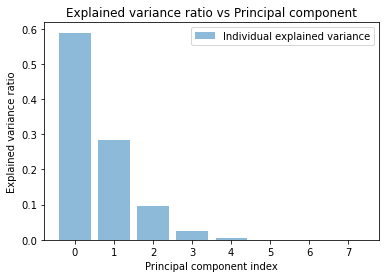

Number 0 dimension has a variance of: 0.588921209829577 and thecorresponding eigenvalue is: 706.7054517954916
Number 1 dimension has a variance of: 0.28506842487265405 and thecorresponding eigenvalue is: 342.08210984718454
Number 2 dimension has a variance of: 0.09646638861890934 and thecorresponding eigenvalue is: 115.75966634269109
Number 3 dimension has a variance of: 0.025351468560903482 and thecorresponding eigenvalue is: 30.42176227308415
Number 4 dimension has a variance of: 0.004192508117956145 and thecorresponding eigenvalue is: 5.031009741547369
Number 5 dimension has a variance of: 6.304405515575087e-17 and thecorresponding eigenvalue is: 7.565286618690096e-14
Number 6 dimension has a variance of: 2.3321266197139515e-17 and thecorresponding eigenvalue is: 2.798551943656739e-14
Number 7 dimension has a variance of: -3.913258416116788e-17 and thecorresponding eigenvalue is: -4.695910099340141e-14


In [8]:
variance_lst, egnvalues = eval(data)
for i in range(0,len(variance_lst)):
    print('Number',i ,'dimension has a variance of:',variance_lst[i],'and thecorresponding eigenvalue is:',egnvalues[i])

In [9]:
variance_lst[0] + variance_lst[1] + variance_lst[2]

0.9704560233211403

I will pick 3 as my k value because the three principal componenet can explain 97% of the data.

# (d)

In [10]:
# (d) Visualize after projecting to 2-D space
def viz(data,sorted_eig_vecs,labels):
    
    n_components = 2
    eigenvector_subset = sorted_eig_vecs[:,0:n_components]
    X_reduced = np.dot(eigenvector_subset.transpose(),data.transpose()).transpose()
    d_viz = np.concatenate((X_reduced, labels.reshape(150,1)), axis=1)
    
    df = pd.DataFrame(d_viz, columns = ['PCA1','PCA2','label'])
    groups = df.groupby('label')
    for name, group in groups:
        plt.plot(group.PCA1, group.PCA2, marker='o', linestyle='', label=name)
        
        
    plt.title('Data in 2-D subspace')
    plt.legend(['label 0','label 1','label 2'])
    return

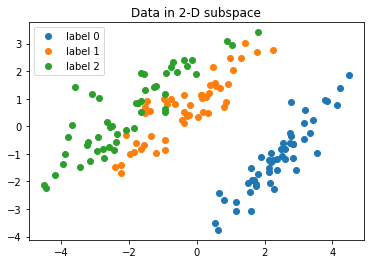

In [11]:
labels = np.load('labels.npy',allow_pickle=True)
viz(data,sorted_eig_vecs,labels)

In [12]:
# def main():

#     eval()
#     viz()

# if __name__ == "__main__":
#     main()

# (e)

(e): Assume you have a dataset with the original dimensionality as 2 and you have to reduce it to 1. Provide a sample scatter plot of the original data (less than 10 datapoints) where PCA might produce misleading results. You can plot it by hand and then take a picture. In the next cell, switch to Markdown mode and use the command: ![title](<your_plot_file_path>)

### PCA is a linear dimension reduction so dataset that are best represented in non linear componenets are not suitable for PCA. (Datasets that have kurtosis that are close to zero are not suitable for PCA)

 ![title](<PCA.jpg>)